In [1]:
# Owner : Arun Jangir
# email : arun.jangir@kaust.edu.sa

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sin,cos,pi
import os

# Styling
def init(figsize, subplts):
    from matplotlib import cycler

    pallete = cycler(
        "color",
        [
            "1f77b4",
            "ff7f0e",
            "2ca02c",
            "8c564b",
            "9467bd",
            "e377c2",
            "7f7f7f",
            "bcbd22",
            "17becf",
            "d62728",
        ])
    font = {'family': 'serif',
        'size': 12}
    plt.rc("text", antialiased=True)
    plt.rc("font", **font)
    plt.rc("mathtext", fontset="stix")
    plt.rc("figure", titlesize=18)
    plt.rc("axes", labelsize=12, prop_cycle=pallete)
    plt.rc("xtick", labelsize=10, direction="in", top=True, bottom=True)
    plt.rc("ytick", labelsize=10, direction="in", right=True, left=True)
    plt.rc(
        "legend",
        fontsize=10,
        title_fontsize=12,
        borderpad=0.2,
        frameon=True,
        labelspacing=0.15,
        columnspacing=0.00,
        markerscale=1.5,
        handlelength=0.8,
        handletextpad=0.5,
        framealpha=0.8,
    )
    mm = 1 / 25.4
    fig, (axes) = plt.subplots(subplts[0], subplts[1], squeeze=False)
    fig.set_size_inches(figsize[0] * mm, figsize[1] * mm)

    return fig, (axes)


def set_limits(axes, limits):
    for i, axs in enumerate(axes):
        for j, ax in enumerate(axs):
            ax.set_xlim(limits[i][j][0:2])
            ax.set_ylim(limits[i][j][2:4])


def set_major_minors(axes, major_minors):
    from matplotlib.ticker import MultipleLocator, AutoMinorLocator
    for i, axs in enumerate(axes):
        for j, ax in enumerate(axs):
            ax.xaxis.set_major_locator(MultipleLocator(major_minors[i][j][0]))
            ax.xaxis.set_minor_locator(MultipleLocator(major_minors[i][j][1]))
            ax.yaxis.set_major_locator(MultipleLocator(major_minors[i][j][2]))
            ax.yaxis.set_minor_locator(MultipleLocator(major_minors[i][j][3]))


def set_labels(axes, labels):
    for i, axs in enumerate(axes):
        for j, ax in enumerate(axs):
            ax.set_xlabel(labels[i][j][0])
            ax.set_ylabel(labels[i][j][1])


def set_legend(axes):
    for axs in axes:
        for ax in axs:
            ax.legend()

In [2]:
def visualize(origin,ions,x,rho,frameNo):
    # Just replace whatever above this part to change plot stying
    subplots = [1, 1]
    figsize = [89, 89]  # in mm
    labels = [
        [[r"$x$", r"$\rho(x)$"]],
    ]  # [[[xlabel,ylabel]]]
    limits = [
        [[-0.0, 1.0, 0, 5]]
    ]  # axes limits [[[xmin,xmax,ymin,ymax]]]
    major_minors = [
        [[0.004, 0.002, 10, 5]]
    ]  # tick location [[[x_major,x_minor,y_major,y_minor]]]
    def plot(axes):
        [[ax]]=axes
        ax.plot(x,rho)
        
        for ion in ions:
            ax.plot(ion[0],1.0,".",markersize=40*ion[1],color="red")
            # ax.add_patch(plt.Circle((ion[0],1),ion[1]))
        set_limits(axes, limits)
        set_labels(axes, labels)
        # set_major_minors(axes, major_minors)
        # set_legend(axes)
    fig, (axes) = init(figsize, subplots)
    plot(axes)
    plt.tight_layout(pad=0.1)
    fig.savefig(f"anim-01/frame-{frameNo:05d}.png")
    plt.close()

In [3]:
dx = 0.0001
x = np.linspace(0,1,int(1.0/dx+1))
print(x[0],x[-1])
data = np.empty((0,4))
frameNo = 1
for origin in np.linspace(0,1,101):
    ion_cell = np.array([[0.1,0.5],[0.3,0.5],[0.6,1.0]]) # [position, charge]
    # Shift the unit cell based on origin
    for i in range(ion_cell.shape[0]):
        ion_cell[i,0] = ion_cell[i,0]-origin
        if ion_cell[i,0]<0:
            ion_cell[i,0] = ion_cell[i,0]+1.0
    # print(ion_cell)
    # Shift the charge density based on origin
    rho = (1+np.sin((x+origin)*2*pi))
    pEle = np.sum(rho*x*dx)
    pIon = np.sum(ion_cell[:,0]*ion_cell[:,1])
    pTotal = pIon-pEle
    data = np.append(data,[[origin,pTotal,pIon,pEle]],axis=0)
    # visualize(origin,ion_cell,x,rho,frameNo)
    frameNo += 1 

0.0 1.0


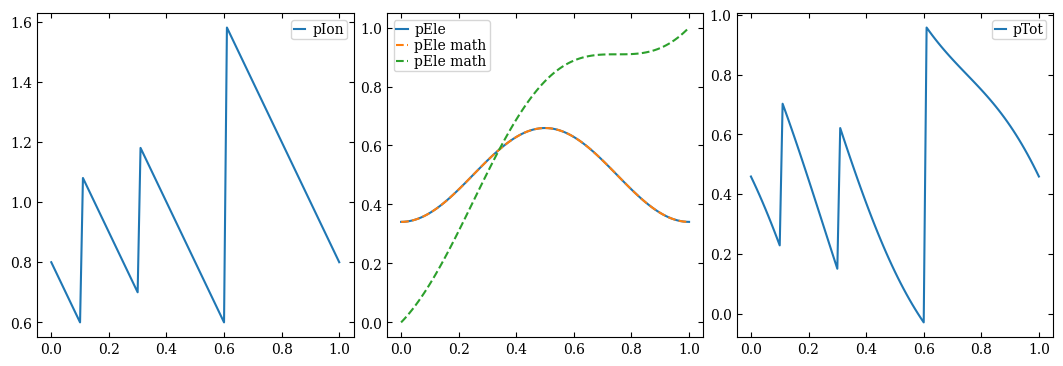

In [5]:
# Just replace whatever above this part to change plot stying
subplots = [1, 3]
figsize = [89*3, 89]  # in mm
labels = [
    [[r"$Origin$", r"Dipole Moment"]],
]  # [[[xlabel,ylabel]]]
limits = [
    [[-0.0, 1.0, 0, 5]]
]  # axes limits [[[xmin,xmax,ymin,ymax]]]
major_minors = [
    [[0.004, 0.002, 10, 5]]
]  # tick location [[[x_major,x_minor,y_major,y_minor]]]
def plot(axes):
    [[ax1,ax2,ax3]]=axes
    ax1.plot(data[:,0],data[:,2],label="pIon")
    ax2.plot(data[:,0],data[:,3],label="pEle")
    a=np.linspace(0,1,101)
    pEleFn = (pi-np.cos(2*pi*a))/(2*pi)
    f3=a+(np.sin(pi*a)**2)/pi
    ax2.plot(a,pEleFn,"--",label="pEle math")
    ax2.plot(a,f3,"--",label="pEle math")
    ax3.plot(data[:,0],data[:,1],label="pTot")
    # set_labels(axes, labels)
    # set_limits(axes, limits)
    # set_major_minors(axes, major_minors)
    set_legend(axes)

fig, (axes) = init(figsize, subplots)
plot(axes)
plt.tight_layout(pad=0.1)
# fig.savefig(f"{OUTDIR}/with-sym/pristine-1x1-vs-3x3.svg")
plt.show()